In [1]:
# import packages
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

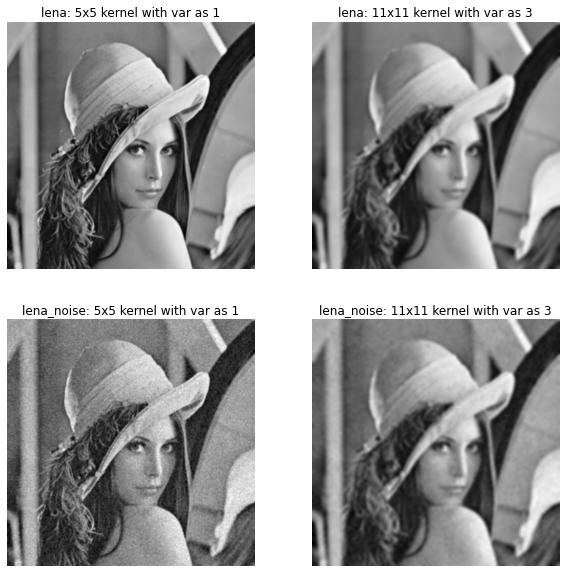

In [2]:
def genGaussianKernel(width, sigma):
    
    # define you 2d kernel here
    # fill in your codes ...

    x = np.arange(-int(width/2), int(width/2)+1, 1, dtype=np.float32)
    x2d, y2d = np.meshgrid(x, x)
    kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
    kernel_2d = kernel_2d / np.sum(kernel_2d)
    return kernel_2d

# Load images
lena       = cv2.imread('/Users/ann/Documents/GitHub/Computer-Vision-1/Homework 1/SourceImages/lena.bmp', 0)
lena_noise = cv2.imread('/Users/ann/Documents/GitHub/Computer-Vision-1/Homework 1/SourceImages/lena_noise.bmp', 0)

# Generate Gaussian kernels
kernel_1 = genGaussianKernel(5, 1) # fill in your codes ...    # 5 by 5 kernel with sigma of 1
kernel_2 = genGaussianKernel(11, 3) # fill in your codes ...   # 11 by 11 kernel with sigma of 3

# Convolve with lena and lena_noise
res_lena_kernel1 = cv2.filter2D(lena, -1, kernel_1) # fill in your codes ...
res_lena_kernel2 = cv2.filter2D(lena, -1, kernel_2) # fill in your codes ...
res_lena_noise_kernel1 = cv2.filter2D(lena_noise, -1, kernel_1) # fill in your codes ...
res_lena_noise_kernel2 = cv2.filter2D(lena_noise, -1, kernel_2) # fill in your codes ...

# Write out result images
cv2.imwrite("Results/P1_01.jpg", res_lena_kernel1)
cv2.imwrite("Results/P1_02.jpg", res_lena_kernel2)
cv2.imwrite("Results/P1_03.jpg", res_lena_noise_kernel1)
cv2.imwrite("Results/P1_04.jpg", res_lena_noise_kernel2)

# Plot results
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.imshow(res_lena_kernel1, 'gray')
plt.title('lena: 5x5 kernel with var as 1')
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(res_lena_kernel2, 'gray')
plt.title('lena: 11x11 kernel with var as 3')
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(res_lena_noise_kernel1, 'gray')
plt.title('lena_noise: 5x5 kernel with var as 1')
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(res_lena_noise_kernel2, 'gray')
plt.title('lena_noise: 11x11 kernel with var as 3')
plt.axis("off")

plt.show()

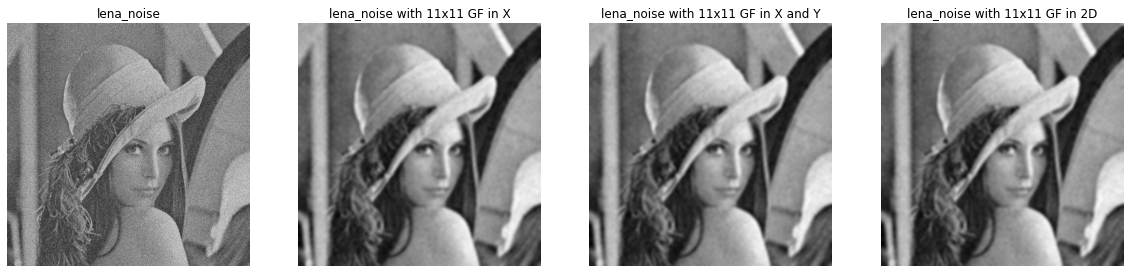

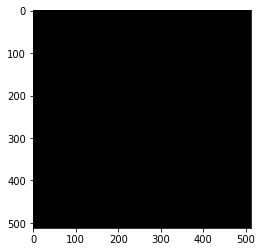

In [3]:
def genGausKernel1D(length, sigma):
    
    # define you 1d kernel here
    # fill in your codes ...
 
    ax = np.linspace(-(length - 1) / 2., (length - 1) / 2., length)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))

    kernel_1d = kernel / np.sum(kernel)

    return kernel_1d

# Generate two 1d kernels here
width = 11
sigma = 3
kernel_x = genGausKernel1D(width, sigma)
kernel_y = np.transpose(kernel_x)

# Generate a 2d 11x11 kernel with sigma of 3 here as before
kernel_2d = genGaussianKernel(width, sigma) 

# Convolve with lena_noise
res_lena_noise_kernel1d_x  = cv2.filter2D(lena_noise, -1, kernel_x)
res_lena_noise_kernel1d_xy = cv2.filter2D(lena_noise, -1, kernel_y)
res_lena_noise_kernel2d    = cv2.filter2D(lena_noise, -1, kernel_2d)


# Plot results
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(lena_noise, 'gray')
plt.title('lena_noise')
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(res_lena_noise_kernel1d_x, 'gray')
plt.title('lena_noise with 11x11 GF in X')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(res_lena_noise_kernel1d_xy, 'gray')
plt.title('lena_noise with 11x11 GF in X and Y')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(res_lena_noise_kernel2d, 'gray')
plt.title('lena_noise with 11x11 GF in 2D')
plt.axis("off")

plt.show()

# Compute the difference array here

lena_diff = cv2.subtract(res_lena_noise_kernel2d, res_lena_noise_kernel1d_xy)

plt.gray()
plt.imshow(lena_diff)

In [4]:
# Plot results
def plot_bw(images):
    num = len(images)
    if (num % 3 == 0):
        k = 3
    else:
        k = 2
    nrows = (num + 1) // k
    fig = plt.figure(figsize=(18, 6 * nrows))
    for i in range(num):
        plt.subplot((num + 1) // k, k, i+1)
        plt.imshow(images[i], cmap=cm.gray)
        plt.title('image ' + str(i+1))
        plt.axis("off")

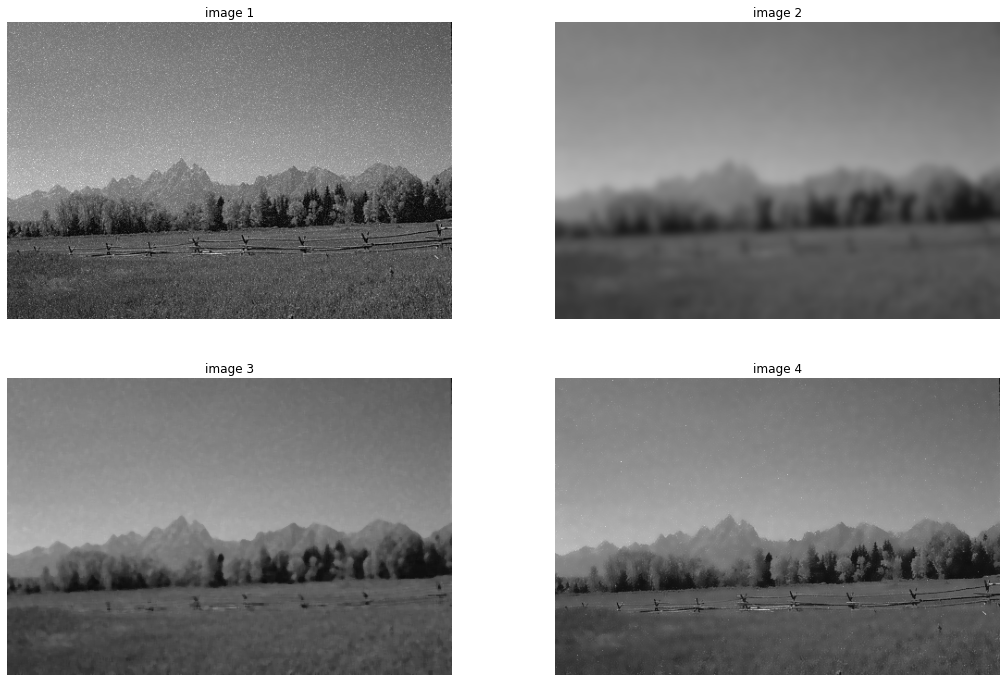

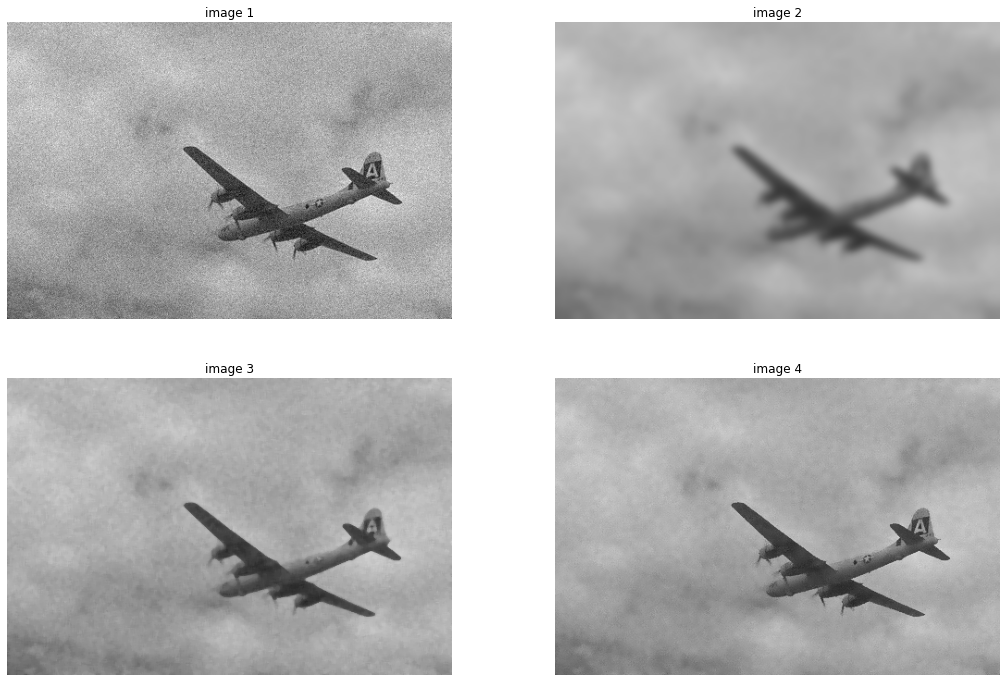

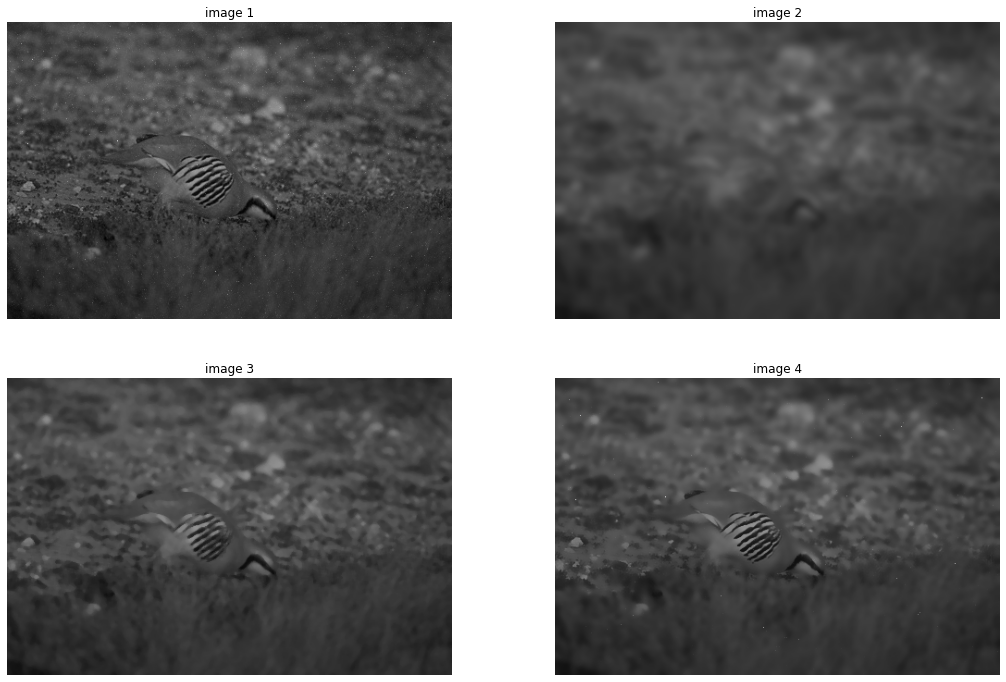

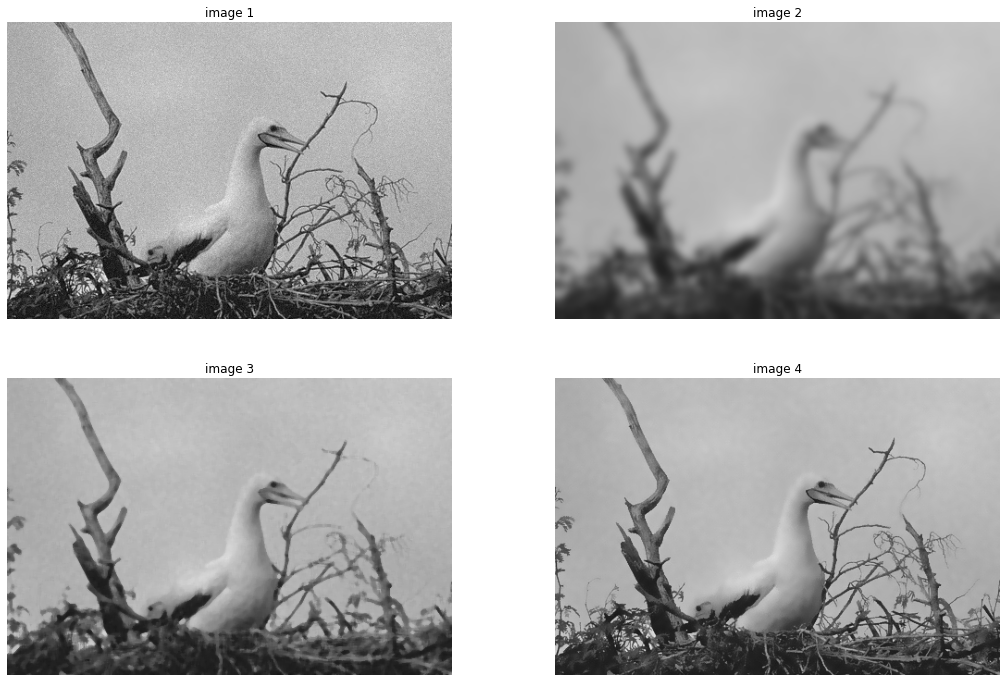

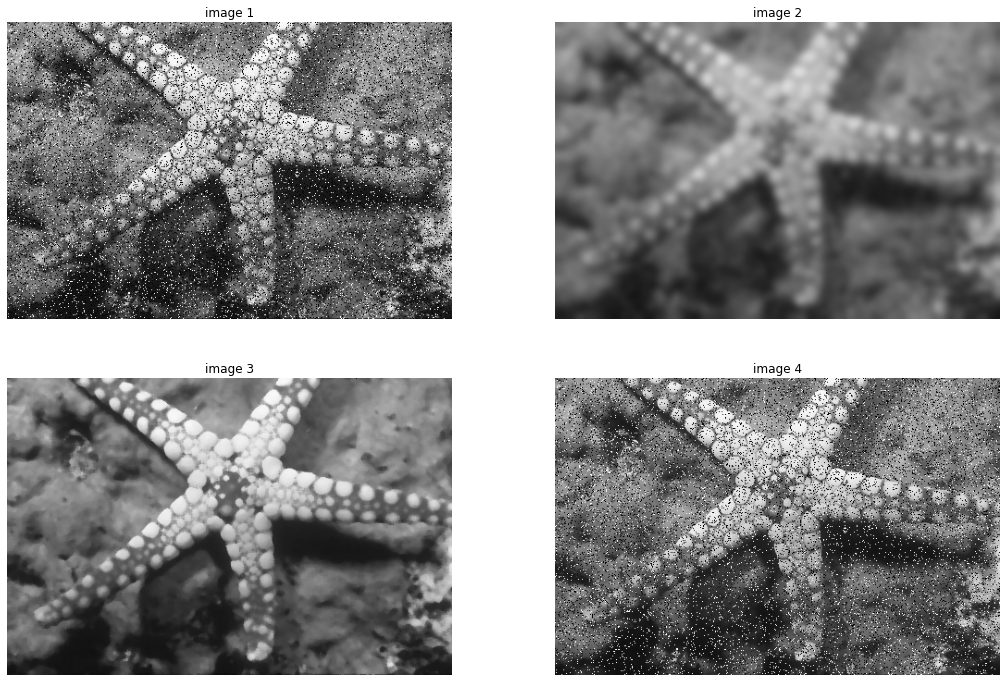

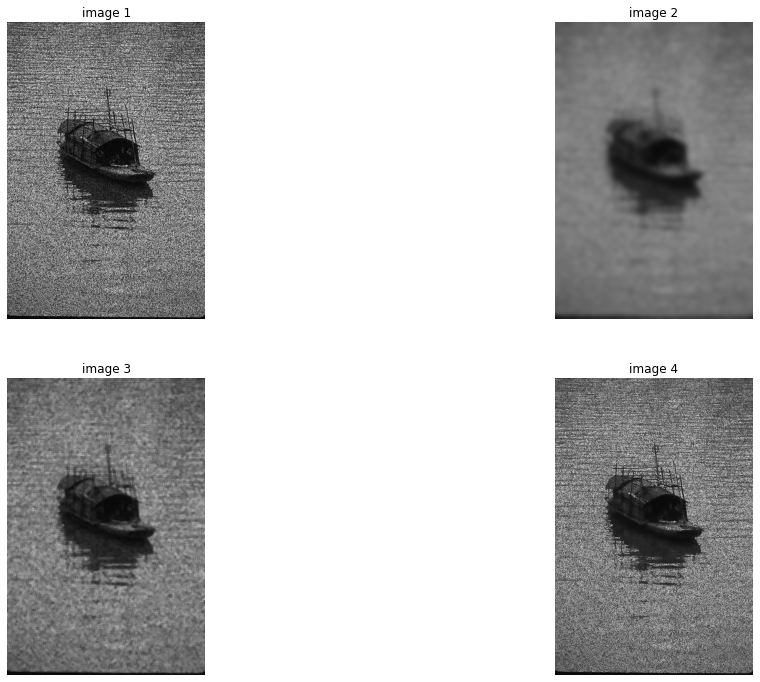

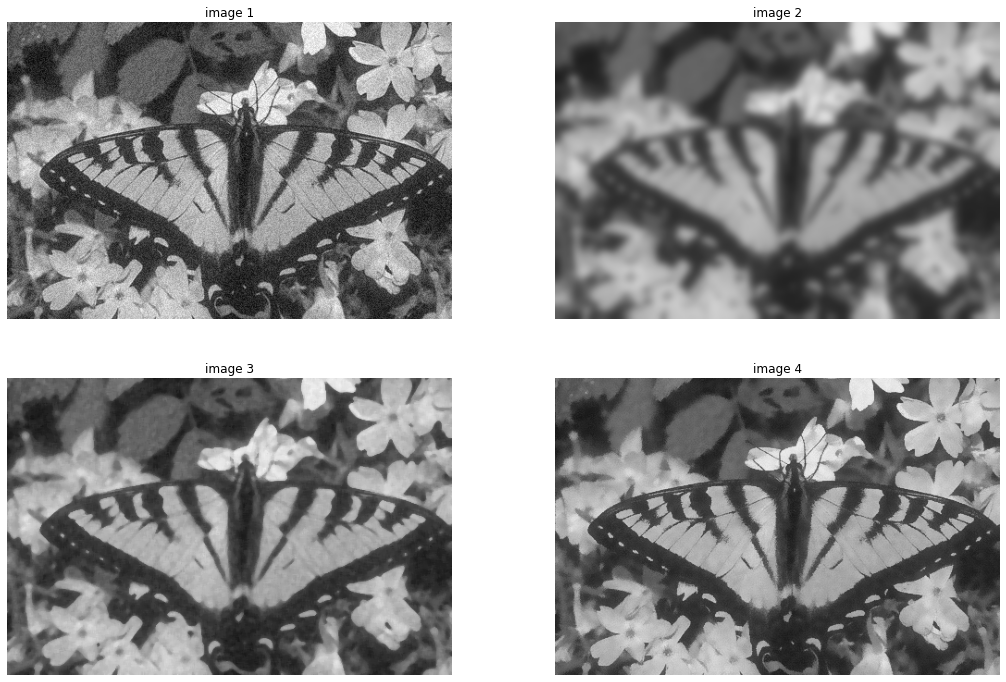

In [35]:
noise_image = cv2.imread("/Users/ann/Documents/GitHub/Computer-Vision-1/Homework 1/SourceImages/noise_images/noise_image0.jpg")
noise_image1 = cv2.imread("/Users/ann/Documents/GitHub/Computer-Vision-1/Homework 1/SourceImages/noise_images/noise_image1.jpg")
noise_image2 = cv2.imread("/Users/ann/Documents/GitHub/Computer-Vision-1/Homework 1/SourceImages/noise_images/noise_image2.jpg")
noise_image3 = cv2.imread("/Users/ann/Documents/GitHub/Computer-Vision-1/Homework 1/SourceImages/noise_images/noise_image3.jpg")
noise_image4 = cv2.imread("/Users/ann/Documents/GitHub/Computer-Vision-1/Homework 1/SourceImages/noise_images/noise_image4.jpg")
noise_image5 = cv2.imread("/Users/ann/Documents/GitHub/Computer-Vision-1/Homework 1/SourceImages/noise_images/noise_image5.jpg")
noise_image6 = cv2.imread("/Users/ann/Documents/GitHub/Computer-Vision-1/Homework 1/SourceImages/noise_images/noise_image6.jpg")

plot_bw([noise_image, cv2.GaussianBlur(noise_image, (25, 25), 0), cv2.medianBlur(noise_image, 5), cv2.bilateralFilter(noise_image,9,75,75)])
plot_bw([noise_image1, cv2.GaussianBlur(noise_image1, (25, 25), 0), cv2.medianBlur(noise_image1, 5), cv2.bilateralFilter(noise_image1,9,75,75)])
plot_bw([noise_image2, cv2.GaussianBlur(noise_image2, (25, 25), 0), cv2.medianBlur(noise_image2, 5), cv2.bilateralFilter(noise_image2,9,75,75)])
plot_bw([noise_image3, cv2.GaussianBlur(noise_image3, (25, 25), 0), cv2.medianBlur(noise_image3, 5), cv2.bilateralFilter(noise_image3,9,75,75)])
plot_bw([noise_image4, cv2.GaussianBlur(noise_image4, (25, 25), 0), cv2.medianBlur(noise_image4, 5), cv2.bilateralFilter(noise_image4,9,75,75)])
plot_bw([noise_image5, cv2.GaussianBlur(noise_image5, (25, 25), 0), cv2.medianBlur(noise_image5, 5), cv2.bilateralFilter(noise_image5,9,75,75)])
plot_bw([noise_image6, cv2.GaussianBlur(noise_image6, (25, 25), 0), cv2.medianBlur(noise_image6, 5), cv2.bilateralFilter(noise_image6,9,75,75)])
